In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
 99% 1.67G/1.68G [00:22<00:00, 40.8MB/s]
100% 1.68G/1.68G [00:22<00:00, 80.9MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/deepfake-and-real-images.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
train_df=keras.utils.image_dataset_from_directory(
    directory='/content/Dataset/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
val_df=keras.utils.image_dataset_from_directory(
    directory='/content/Dataset/Validation',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_df=train_df.map(process)
val_df=val_df.map(process)


In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,209,025 (65.65 MB)

 Trainable params: 17,208,065 (65.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [ ]:
history = model.fit(
    train_df,
    validation_data=val_df,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7741 - loss: 0.4814

4376/4376 ━━━━━━━━━━━━━━━━━━━━ 459s 101ms/step - accuracy: 0.7742 - loss: 0.4814 - val_accuracy: 0.9058 - val_loss: 0.2315
Epoch 2/20
4375/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9460 - loss: 0.1392

4376/4376 ━━━━━━━━━━━━━━━━━━━━ 421s 96ms/step - accuracy: 0.9460 - loss: 0.1392 - val_accuracy: 0.9393 - val_loss: 0.1628
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 420s 96ms/step - accuracy: 0.9634 - loss: 0.0920 - val_accuracy: 0.9276 - val_loss: 0.1783
Epoch 4/20
4375/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9721 - loss: 0.0731

4376/4376 ━━━━━━━━━━━━━━━━━━━━ 421s 96ms/step - accuracy: 0.9721 - loss: 0.0731 - val_accuracy: 0.9494 - val_loss: 0.1306
Epoch 5/20
4375/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9781 - loss: 0.0551

4376/4376 ━━━━━━━━━━━━━━━━━━━━ 441s 96ms/step - accuracy: 0.9781 - loss: 0.0551 - val_accuracy: 0.9514 - val_loss: 0.1293
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 419s 96ms/step - accuracy: 0.9809 - loss: 0.0476 - val_accuracy: 0.9523 - val_loss: 0.1506
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 441s 96ms/step - accuracy: 0.9843 - loss: 0.0382 - val_accuracy: 0.9243 - val_loss: 0.2755
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 441s 95ms/step - accuracy: 0.9865 - loss: 0.0350 - val_accuracy: 0.9493 - val_loss: 0.1680
Epoch 9/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 419s 96ms/step - accuracy: 0.9871 - loss: 0.0317 - val_accuracy: 0.9582 - val_loss: 0.1534
Epoch 10/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 442s 96ms/step - accuracy: 0.9892 - loss: 0.0276 - val_accuracy: 0.9577 - val_loss: 0.1525


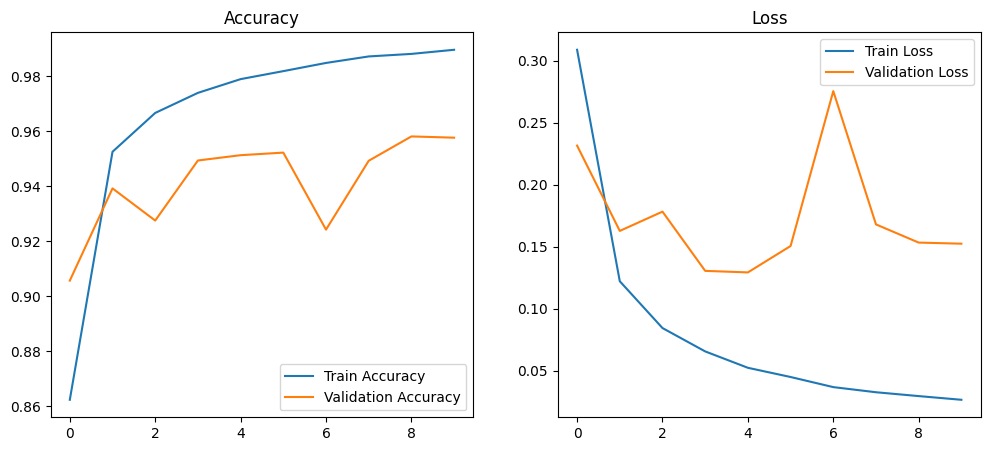

In [ ]:
# Accuracy & Loss plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
